## Transfer learning with SqueezeNet

These cells do the essential tasks from the previous chapter: load training and testing data, add the labels, then train and evaluate the model. The only difference is using SqueezeNet instead of VisionFeaturePrint_Screen as the base model for transfer learning.

There's an option to load the pre-trained model.

In [1]:
import turicreate as tc
import matplotlib.pyplot as plt

In [2]:
train_data = tc.image_analysis.load_images("snacks/train", with_path=True)
len(train_data)

Read 1163 images in 5.05759 secs	speed: 229.952 file/sec

Read 1398 images in 10.0892 secs	speed: 46.7047 file/sec

Read 1807 images in 15.1194 secs	speed: 81.3087 file/sec

Read 2010 images in 20.1275 secs	speed: 40.5341 file/sec

Read 2214 images in 25.1765 secs	speed: 40.4041 file/sec

Read 2769 images in 30.1904 secs	speed: 110.693 file/sec

Read 3468 images in 35.2041 secs	speed: 139.419 file/sec

Read 4522 images in 40.2198 secs	speed: 210.139 file/sec

4838

In [3]:
test_data = tc.image_analysis.load_images("snacks/test", with_path=True)
len(test_data)

952

In [4]:
import os
train_data["label"] = train_data["path"].apply(lambda path: 
                                               os.path.basename(os.path.split(path)[0]))
test_data["label"] = test_data["path"].apply(lambda path: 
                                             os.path.basename(os.path.split(path)[0]))
train_data["label"].value_counts().print_rows(num_rows=20)
test_data["label"].value_counts().print_rows(num_rows=20)

+------------+-------+
|   value    | count |
+------------+-------+
| pineapple  |  260  |
|   juice    |  250  |
|   banana   |  250  |
|   apple    |  250  |
|  doughnut  |  250  |
| watermelon |  250  |
|   waffle   |  250  |
|   muffin   |  250  |
|   salad    |  250  |
| ice cream  |  250  |
|  hot dog   |  250  |
|   grape    |  250  |
|   carrot   |  249  |
|    cake    |  249  |
|   cookie   |  249  |
|   orange   |  249  |
|   candy    |  249  |
| strawberry |  249  |
|  popcorn   |  180  |
|  pretzel   |  154  |
+------------+-------+
[20 rows x 2 columns]

+------------+-------+
|   value    | count |
+------------+-------+
|  hot dog   |   50  |
|   juice    |   50  |
|   banana   |   50  |
|   orange   |   50  |
|   cookie   |   50  |
|   carrot   |   50  |
|   waffle   |   50  |
|    cake    |   50  |
|   salad    |   50  |
| ice cream  |   50  |
|   candy    |   50  |
|   grape    |   50  |
| watermelon |   50  |
|   apple    |   50  |
|  doughnut  |   50  |
| strawberr

Run the next cell to train the model.

**OR**

Run the cell **after** the next cell, to load the model from the current folder.

In [5]:
# Train the image classifier
model = tc.image_classifier.create(train_data, target="label", 
                                   model="squeezenet_v1.1",
                                   verbose=True, max_iterations=100)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 604.784ms    | 1.25%            |

| 128              | 744.457ms    | 2.5%             |

| 192              | 884.334ms    | 3.75%            |

| 256              | 1.02s        | 5.25%            |

| 320              | 1.16s        | 6.5%             |

| 640              | 1.85s        | 13%              |

| 1600             | 3.95s        | 32.75%           |

| 3200             | 7.41s        | 65.75%           |

| 4800             | 10.87s       | 98.5%            |

| 4838             | 11.02s       | 100%             |

+------------------+--------------+------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4596

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.332704     | 0.085509          | 0.078512            |

| 1         | 7        | 1.250000  | 0.688568     | 0.304178          | 0.293388            |

| 2         | 8        | 1.250000  | 0.873706     | 0.142950          | 0.119835            |

| 3         | 9        | 1.250000  | 1.056690     | 0.300261          | 0.247934            |

| 4         | 10       | 1.250000  | 1.255690     | 0.222802          | 0.194215            |

| 9         | 16       | 1.000000  | 2.301169     | 0.446693          | 0.421488            |

| 24        | 36       | 1.000000  | 6.129805     | 0.602045          | 0.590909            |

| 49        | 77       | 1.118439  | 12.917828    | 0.698869          | 0.628099            |

| 74        | 111      | 1.000000  | 19.159802    | 0.747171          | 0.673554            |

| 99        | 143      | 1.000000  | 25.300251    | 0.795257          | 0.673554            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [4]:
# OR load MultiSnacks.model from current folder
model = tc.load_model("MultiSnacks.model")

In [6]:
model.classifier

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 19019
Number of examples             : 4596
Number of classes              : 20
Number of feature columns      : 1
Number of unpacked features    : 1000

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 100
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 12.5499

Settings
--------
Log-likelihood                 : 3041.3158

Highest Positive Coefficients
-----------------------------
(intercept)                    : 0.3017
(intercept)                    : 0.2495
(intercept)                    : 0.1129
__image_features__[839]        : 0.111
__image_features__[271]        : 0.0995

Lowest Negative Coefficients
----------------------------
(intercept)                    : -0.

Continue with trained or loaded model.

In [7]:
metrics = model.evaluate(test_data)
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 475.726ms    | 6.5%             |

| 128              | 615.557ms    | 13.25%           |

| 192              | 756.274ms    | 20%              |

| 256              | 895.81ms     | 26.5%            |

| 320              | 1.03s        | 33.25%           |

| 640              | 1.73s        | 66.5%            |

| 952              | 2.41s        | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6439075630252101
Precision:  0.6417490793302572
Recall:  0.6431947278911565


## Getting individual predictions

In [8]:
model.predict(test_data)

dtype: str
Rows: 952
['juice', 'grape', 'orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'watermelon', 'apple', 'apple', 'apple', 'strawberry', 'apple', 'apple', 'carrot', 'candy', 'ice cream', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'pineapple', 'orange', 'apple', 'apple', 'apple', 'doughnut', 'grape', 'apple', 'apple', 'orange', 'grape', 'apple', 'orange', 'apple', 'grape', 'apple', 'apple', 'apple', 'strawberry', 'orange', 'juice', 'apple', 'watermelon', 'apple', 'apple', 'banana', 'banana', 'pineapple', 'watermelon', 'banana', 'banana', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'muffin', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'juice', 'watermelon', 'hot dog', 'banana', 'pretzel', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'banana', 'banana', 'cookie', 'banana', 'orange', 'bana

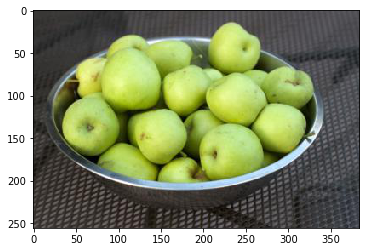

In [9]:
plt.imshow(test_data[1]["image"].pixel_data)

In [10]:
output = model.classify(test_data)
output

class,probability
juice,0.310875650141583
grape,0.3956502013612714
orange,0.39538090296648265
orange,0.8976618147216178
orange,0.3072119182057209
apple,0.9799928015960225
orange,0.3865466153652425
apple,0.42822296621018285
watermelon,0.749243879680526
apple,0.9083423391632507


In [11]:
imgs_with_pred = test_data.add_columns(output)
imgs_with_pred.explore()

Materializing SFrame

In [12]:
imgs_filtered = imgs_with_pred[(imgs_with_pred["probability"] > 0.9) & 
                 (imgs_with_pred["label"] != imgs_with_pred["class"] )]
imgs_filtered.explore()

Materializing SFrame

### Sorting the prediction probabilities

In [13]:
predictions = model.predict(test_data, output_type="probability_vector")
print("Probabilities for 2nd image", predictions[1])

Probabilities for 2nd image array('d', [0.28649353163077507, 0.021471646172138575, 2.4843442664000567e-05, 0.01931615155262629, 0.002893942228880033, 0.0032271662456519307, 6.111104463256687e-05, 0.3956502013612714, 9.315914880779299e-06, 3.913784313916669e-05, 2.549320086039512e-05, 1.00155513934948e-06, 0.2687142431076742, 0.0006883357597396455, 4.887305155387977e-05, 7.929739031400189e-08, 0.0005855183116902022, 6.897952527586654e-05, 9.250795546818723e-07, 0.0006795036744617884])


In [14]:
labels = test_data["label"].unique().sort()
preds = tc.SArray(predictions[1])
tc.SFrame({"preds": preds, "labels": labels}).sort([("preds", False)])

labels,preds
grape,0.3956502013612714
apple,0.28649353163077507
orange,0.2687142431076742
banana,0.021471646172138575
candy,0.01931615155262629
cookie,0.0032271662456519307
carrot,0.002893942228880033
pineapple,0.0006883357597396455
watermelon,0.0006795036744617884
salad,0.0005855183116902022


## Using a fixed validation dataset

In [15]:
val_data = tc.image_analysis.load_images("snacks/val", with_path=True)
val_data["label"] = val_data["path"].apply(lambda path: 
      os.path.basename(os.path.split(path)[0]))
len(val_data)

955

## Increasing max iterations

Run the next cell to load the model from the current folder.

**OR**

Run the two cells **after** the next cell, to train and save the model. 

In [14]:
# Load MultiSnacks_200.model from the current folder
model = tc.load_model("MultiSnacks_200.model")

In [16]:
# Train the image classifier
model = tc.image_classifier.create(train_data, target="label", 
                                   model="squeezenet_v1.1",
                                   verbose=True, max_iterations=200,
                                   validation_set=val_data)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 490.089ms    | 1.25%            |

| 128              | 630.4ms      | 2.5%             |

| 192              | 769.774ms    | 3.75%            |

| 256              | 909.68ms     | 5.25%            |

| 320              | 1.04s        | 6.5%             |

| 640              | 1.74s        | 13%              |

| 1600             | 3.84s        | 32.75%           |

| 3200             | 7.32s        | 65.75%           |

| 4800             | 10.86s       | 98.5%            |

| 4838             | 10.94s       | 100%             |

+------------------+--------------+------------------+

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 560.438ms    | 6.5%             |

| 128              | 700.01ms     | 13.25%           |

| 192              | 851.477ms    | 20%              |

| 320              | 1.12s        | 33.25%           |

| 640              | 1.81s        | 66.5%            |

| 955              | 2.54s        | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4838

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.374372     | 0.078338          | 0.070157            |

| 1         | 7        | 1.250000  | 0.779622     | 0.294750          | 0.273298            |

| 2         | 8        | 1.250000  | 1.029926     | 0.139107          | 0.150785            |

| 3         | 9        | 1.250000  | 1.256821     | 0.272013          | 0.268063            |

| 4         | 10       | 1.250000  | 1.480616     | 0.241835          | 0.213613            |

| 9         | 17       | 1.000000  | 2.882637     | 0.446465          | 0.406283            |

| 24        | 34       | 1.000000  | 6.560546     | 0.602315          | 0.549738            |

| 49        | 66       | 1.000000  | 13.194098    | 0.705043          | 0.608377            |

| 74        | 94       | 1.000000  | 19.769601    | 0.745969          | 0.626178            |

| 99        | 133      | 1.000000  | 27.280202    | 0.795783          | 0.631414            |

| 124       | 167      | 1.000000  | 34.160101    | 0.834849          | 0.625131            |

| 149       | 213      | 1.247567  | 41.909724    | 0.865854          | 0.636649            |

| 174       | 243      | 1.000000  | 47.718344    | 0.891484          | 0.635602            |

| 199       | 281      | 1.000000  | 54.308334    | 0.908433          | 0.620942            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [ ]:
model.save("MultiSnacks_200.model")

Continue with trained or loaded model.

In [17]:
metrics = model.evaluate(test_data)
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 494.554ms    | 6.5%             |

| 128              | 634.798ms    | 13.25%           |

| 192              | 774.589ms    | 20%              |

| 256              | 914.466ms    | 26.5%            |

| 320              | 1.05s        | 33.25%           |

| 640              | 1.73s        | 66.5%            |

| 952              | 2.44s        | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6554621848739496
Precision:  0.6535792163681828
Recall:  0.6510697278911566


## Confusing apples with oranges?

In [19]:
import numpy as np
import seaborn as sns

def compute_confusion_matrix(metrics, labels):
    num_labels = len(labels)
    label_to_index = {l:i for i,l in enumerate(labels)}

    conf = np.zeros((num_labels, num_labels), dtype=np.int)
    for row in metrics["confusion_matrix"]:
        true_label = label_to_index[row["target_label"]]
        pred_label = label_to_index[row["predicted_label"]]
        conf[true_label, pred_label] = row["count"]
        
    return conf

def plot_confusion_matrix(conf, labels, figsize=(8, 8)):
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(conf, annot=True, fmt="d")
    heatmap.xaxis.set_ticklabels(labels, rotation=45, 
                                 ha="right", fontsize=12)
    heatmap.yaxis.set_ticklabels(labels, rotation=0, 
                                 ha="right", fontsize=12)
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.show()

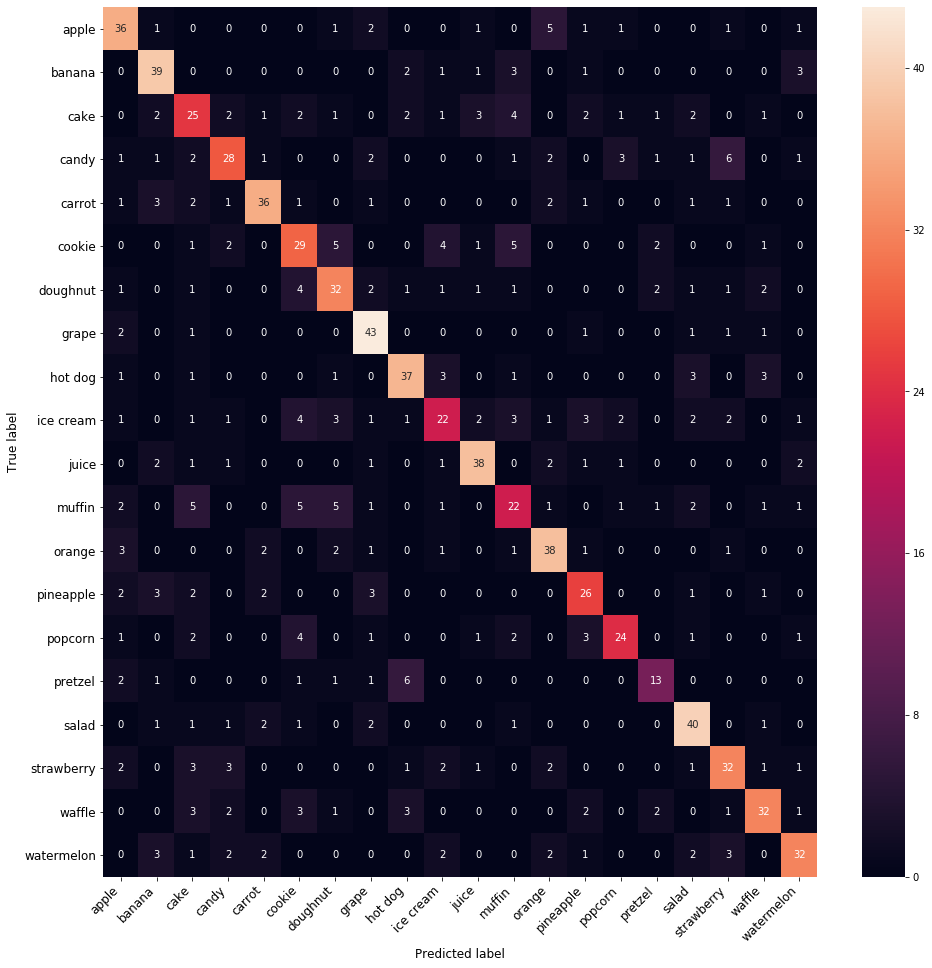

In [20]:
conf = compute_confusion_matrix(metrics, labels)
plot_confusion_matrix(conf, labels, figsize=(16, 16))

### Computing recall for each class

In [21]:
for i, label in enumerate(labels):
    correct = conf[i, i]
    images_per_class = conf[i].sum()
    print("%10s %.1f%%" % (label, 100. * correct/images_per_class))

     apple 72.0%
    banana 78.0%
      cake 50.0%
     candy 56.0%
    carrot 72.0%
    cookie 58.0%
  doughnut 64.0%
     grape 86.0%
   hot dog 74.0%
 ice cream 44.0%
     juice 76.0%
    muffin 45.8%
    orange 76.0%
 pineapple 65.0%
   popcorn 60.0%
   pretzel 52.0%
     salad 80.0%
strawberry 65.3%
    waffle 64.0%
watermelon 64.0%


## Training the classifier with regularization

In [24]:
model = tc.image_classifier.create(train_data, target="label",
                                   model="squeezenet_v1.1",
                                   verbose=True, max_iterations=200,
                                   validation_set=val_data,
                                   l2_penalty=10.0, l1_penalty=0.0,
                                   convergence_threshold=1e-8)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 476.757ms    | 1.25%            |

| 128              | 617.037ms    | 2.5%             |

| 192              | 756.807ms    | 3.75%            |

| 256              | 896.314ms    | 5.25%            |

| 320              | 1.03s        | 6.5%             |

| 640              | 1.73s        | 13%              |

| 1600             | 3.81s        | 32.75%           |

| 3200             | 7.32s        | 65.75%           |

| 4800             | 10.75s       | 98.5%            |

| 4838             | 10.89s       | 100%             |

+------------------+--------------+------------------+

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 466.136ms    | 6.5%             |

| 128              | 605.378ms    | 13.25%           |

| 192              | 744.692ms    | 20%              |

| 256              | 884.137ms    | 26.5%            |

| 320              | 1.02s        | 33.25%           |

| 640              | 1.70s        | 66.5%            |

| 955              | 2.41s        | 100%             |

+------------------+--------------+------------------+

Logistic regression:

--------------------------------------------------------

Number of examples          : 4838

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.377966     | 0.078338          | 0.070157            |

| 1         | 7        | 1.250000  | 0.744570     | 0.294957          | 0.273298            |

| 2         | 8        | 1.250000  | 0.931261     | 0.139107          | 0.150785            |

| 3         | 9        | 1.250000  | 1.128714     | 0.272427          | 0.268063            |

| 4         | 10       | 1.250000  | 1.331893     | 0.243282          | 0.216754            |

| 9         | 17       | 1.000000  | 2.652843     | 0.446672          | 0.406283            |

| 24        | 35       | 1.000000  | 6.131676     | 0.600248          | 0.553927            |

| 49        | 67       | 1.000000  | 12.192959    | 0.700083          | 0.603141            |

| 74        | 98       | 1.000000  | 18.475967    | 0.736668          | 0.632461            |

| 99        | 139      | 0.545858  | 25.783521    | 0.758371          | 0.645026            |

| 124       | 183      | 2.755461  | 33.123541    | 0.780281          | 0.643979            |

| 149       | 221      | 1.000000  | 39.888817    | 0.785449          | 0.646073            |

| 174       | 258      | 0.965087  | 46.111951    | 0.784415          | 0.647120            |

| 199       | 305      | 1.326954  | 53.436059    | 0.786895          | 0.649215            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

## Wrangling Turi Create code 

### Saving the extracted features

In [27]:
from turicreate.toolkits import _pre_trained_models
from turicreate.toolkits import _image_feature_extractor

ptModel = _pre_trained_models.MODELS["squeezenet_v1.1"]()
feature_extractor = _image_feature_extractor.MXFeatureExtractor(ptModel)

Download completed: /var/folders/2h/jdd0ymmj2bgck8148622rkbr0000gn/T/model_cache/squeezenet_v1.1-symbol.json
Download completed: /var/folders/2h/jdd0ymmj2bgck8148622rkbr0000gn/T/model_cache/squeezenet_v1.1-0000.params


In [29]:
train_features = feature_extractor.extract_features(train_data, 
                                          "image", verbose=True)

Performing feature extraction on resized images...
Completed   64/4838
Completed  128/4838
Completed  192/4838
Completed  256/4838
Completed  320/4838
Completed  384/4838
Completed  448/4838
Completed  512/4838
Completed  576/4838
Completed  640/4838
Completed  704/4838
Completed  768/4838
Completed  832/4838
Completed  896/4838
Completed  960/4838
Completed 1024/4838
Completed 1088/4838
Completed 1152/4838
Completed 1216/4838
Completed 1280/4838
Completed 1344/4838
Completed 1408/4838
Completed 1472/4838
Completed 1536/4838
Completed 1600/4838
Completed 1664/4838
Completed 1728/4838
Completed 1792/4838
Completed 1856/4838
Completed 1920/4838
Completed 1984/4838
Completed 2048/4838
Completed 2112/4838
Completed 2176/4838
Completed 2240/4838
Completed 2304/4838
Completed 2368/4838
Completed 2432/4838
Completed 2496/4838
Completed 2560/4838
Completed 2624/4838
Completed 2688/4838
Completed 2752/4838
Completed 2816/4838
Completed 2880/4838
Completed 2944/4838
Completed 3008/4838
Completed

In [30]:
extracted_train_features = tc.SFrame({
    "label": train_data["label"],
    "__image_features__": train_features,
    })
extracted_train_features.save("extracted_train_features.sframe")

In [31]:
val_features = feature_extractor.extract_features(val_data, 
                                      "image", verbose=True)

extracted_val_features = tc.SFrame({
    "label": val_data["label"],
    '__image_features__': val_features,
    })
    
extracted_val_features.save("extracted_val_features.sframe")  

Performing feature extraction on resized images...
Completed  64/955
Completed 128/955
Completed 192/955
Completed 256/955
Completed 320/955
Completed 384/955
Completed 448/955
Completed 512/955
Completed 576/955
Completed 640/955
Completed 704/955
Completed 768/955
Completed 832/955
Completed 896/955
Completed 955/955


When you open this notebook again, run the next cell to reload saved features.

In [ ]:
# Run this the next time you open this notebook
extracted_train_features = tc.SFrame("extracted_train_features.sframe")
extracted_val_features = tc.SFrame("extracted_val_features.sframe")

Continue working with extracted features.

In [32]:
extracted_train_features.head()

__image_features__,label
"[6.1337385177612305,10.12844181060791, ...",apple
"[9.666999816894531,14.665328025817871, ...",apple
"[10.662524223327637,15.472965240478516, ...",apple
"[12.159001350402832,11.231389045715332, ...",apple
"[17.9743709564209,19.089576721191406, ...",apple
"[5.879778861999512,9.116369247436523, ...",apple
"[6.7489848136901855,6.330108642578125, ...",apple
"[5.711240291595459,13.054986000061035, ...",apple
"[8.625852584838867,6.533729553222656, ...",apple
"[6.440614700317383,13.472396850585938, ...",apple


In [ ]:
extracted_train_features[0]["__image_features__"]

In [34]:
len(extracted_train_features[0]["__image_features__"])

1000

### Training the model

In [42]:
lr_model = tc.logistic_classifier.create(extracted_train_features,
                             features=["__image_features__"],
                             target="label",
                             validation_set=extracted_val_features,
                             max_iterations=400,
                             seed=None,
                             verbose=True,
                             l2_penalty=10.0,
                             l1_penalty=0.0,
                             convergence_threshold=1e-8)

Logistic regression:

--------------------------------------------------------

Number of examples          : 4838

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 4        | 0.250000  | 0.350604     | 0.078338          | 0.070157            |

| 1         | 7        | 1.250000  | 0.720426     | 0.294750          | 0.273298            |

| 2         | 8        | 1.250000  | 0.921298     | 0.139314          | 0.150785            |

| 3         | 9        | 1.250000  | 1.158684     | 0.272220          | 0.268063            |

| 4         | 10       | 1.250000  | 1.360710     | 0.243696          | 0.215707            |

| 9         | 17       | 1.000000  | 2.626963     | 0.447499          | 0.406283            |

| 24        | 35       | 1.000000  | 6.145334     | 0.600248          | 0.553927            |

| 49        | 71       | 1.000000  | 13.044865    | 0.699256          | 0.607330            |

| 74        | 112      | 0.459263  | 19.951853    | 0.738115          | 0.631414            |

| 99        | 149      | 1.000000  | 26.729222    | 0.762505          | 0.648168            |

| 124       | 201      | 1.000000  | 35.434841    | 0.781728          | 0.642932            |

| 149       | 237      | 1.000000  | 41.870859    | 0.787309          | 0.649215            |

| 174       | 282      | 0.532208  | 49.044851    | 0.789169          | 0.649215            |

| 199       | 316      | 0.890721  | 55.313713    | 0.787309          | 0.650262            |

| 224       | 356      | 1.000000  | 62.318101    | 0.787516          | 0.653403            |

| 249       | 391      | 1.000000  | 69.499439    | 0.787309          | 0.652356            |

| 274       | 423      | 0.755726  | 75.568919    | 0.787516          | 0.649215            |

| 299       | 461      | 1.000000  | 81.920141    | 0.788549          | 0.649215            |

| 324       | 497      | 1.000000  | 88.294561    | 0.788962          | 0.651309            |

| 349       | 537      | 1.473795  | 95.164849    | 0.787929          | 0.651309            |

| 374       | 583      | 1.000000  | 102.827020   | 0.788549          | 0.650262            |

| 399       | 617      | 0.500000  | 109.270224   | 0.787929          | 0.650262            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

In [39]:
tc.logistic_classifier.create?

### Convert into an image classifier model

In [43]:
from turicreate.toolkits.image_classifier import ImageClassifier

state = {
    'classifier': lr_model,
    'model': ptModel.name,
    'max_iterations': lr_model.max_iterations,
    'feature_extractor': feature_extractor,
    'input_image_shape': ptModel.input_image_shape,
    'target': lr_model.target,
    'feature': "image",
    'num_features': 1,
    'num_classes': lr_model.num_classes,
    'classes': lr_model.classes,
    'num_examples': lr_model.num_examples,
    'training_time': lr_model.training_time,
    'training_loss': lr_model.training_loss,
}
model = ImageClassifier(state)

In [44]:
metrics = model.evaluate(test_data)
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])

Performing feature extraction on resized images...
Completed  64/952
Completed 128/952
Completed 192/952
Completed 256/952
Completed 320/952
Completed 384/952
Completed 448/952
Completed 512/952
Completed 576/952
Completed 640/952
Completed 704/952
Completed 768/952
Completed 832/952
Completed 896/952
Completed 952/952
Accuracy:  0.6712184873949579
Precision:  0.6755916486674352
Recall:  0.6698818027210884


In [45]:
model.evaluate??

### Saving the model

In [53]:
model.save("MultiSnacks_regularized.model")

In [54]:
model.export_coreml("MultiSnacks_regularized.mlmodel")

In [48]:
model

Class                                    : ImageClassifier

Schema
------
Number of classes                        : 20
Number of feature columns                : 1
Input image shape                        : (3, 227, 227)

Training summary
----------------
Number of examples                       : 4838
Training loss                            : 3952.4993
Training time (sec)                      : 59.2703

In [49]:
model.classifier

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 19019
Number of examples             : 4838
Number of classes              : 20
Number of feature columns      : 1
Number of unpacked features    : 1000

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 10.0

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 400
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 59.2703

Settings
--------
Log-likelihood                 : 3952.4993

Highest Positive Coefficients
-----------------------------
(intercept)                    : 1.8933
(intercept)                    : 1.4506
(intercept)                    : 0.6717
(intercept)                    : 0.5232
(intercept)                    : 0.4072

Lowest Negative Coefficients
----------------------------
(intercept)                    : -1

Reload the no-regularization model to compare the coefficients.

In [57]:
no_reg_model = tc.load_model("MultiSnacks.model")
no_reg_model.classifier

Class                          : LogisticClassifier

Schema
------
Number of coefficients         : 19019
Number of examples             : 4606
Number of classes              : 20
Number of feature columns      : 1
Number of unpacked features    : 1000

Hyperparameters
---------------
L1 penalty                     : 0.0
L2 penalty                     : 0.01

Training Summary
----------------
Solver                         : lbfgs
Solver iterations              : 135
Solver status                  : Completed (Iteration limit reached).
Training time (sec)            : 69.3918

Settings
--------
Log-likelihood                 : 2400.3284

Highest Positive Coefficients
-----------------------------
(intercept)                    : 0.3808
(intercept)                    : 0.3799
(intercept)                    : 0.1918
__image_features__[839]        : 0.1864
(intercept)                    : 0.15

Lowest Negative Coefficients
----------------------------
(intercept)                    : -0.3